<a href="https://colab.research.google.com/github/MostafaAhmed95/D_A/blob/master/DA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch. utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
batch_size = 32
test_batch_size = 100
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# Transformations
data_transformations = transforms.Compose([
                           transforms.Grayscale(num_output_channels=1),
                           transforms.Scale((28,28)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])

# Data Source
svhn = datasets.SVHN('../data', download=True, transform=data_transformations)
svhn_test = datasets.SVHN('../data', split='test', download=True, transform=data_transformations)
mnist_test = datasets.MNIST('../data', train=False,transform=data_transformations, download=True)


# Data loaders
train_loader = DataLoader(svhn,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(svhn_test,
                         batch_size=test_batch_size, shuffle=True)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:211: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


Using downloaded and verified file: ../data/train_32x32.mat


0it [00:00, ?it/s]

64282624it [00:05, 12817964.90it/s]                              


(1, 28, 28)


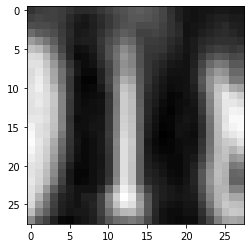

In [10]:
batch,labels = next(iter(train_loader))
image = batch[0]
np_image = image.data.numpy()
print(np_image.shape)
plt.imshow(np_image[0],cmap='gray')
plt.show()

In [0]:
class Net(nn.Module):#This defines the structure of the NN.def __init__(self):super(Net, self).__init__()
        # These are all operations that we are defining.# Unlike keras, this is not the network definition.# This is just initialization of the variables that # we are going to use in the `forward()` function.self.conv1 = nn.Conv2d(1, 10, kernel_size=5)self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) 
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) 
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
#         print("1", x.shape)
        #28x28x1
        x = F.relu(F.max_pool2d(self.conv1(x), 2))#12x12x10
#         print("2", x.shape)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))#4x4x20
#         print("3", x.shape)
        x = x.view(-1, 320)
#         print("4", x.shape)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = Net().to(device)

In [0]:
#train our model
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
            
        


In [0]:
def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [14]:
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 700

model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


    torch.save(model.state_dict(), "sv_inno.pt")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/73257 (0%)]	Loss: 2.338785
Train Epoch: 1 [22400/73257 (31%)]	Loss: 2.161071
Train Epoch: 1 [44800/73257 (61%)]	Loss: 2.246932
Train Epoch: 1 [67200/73257 (92%)]	Loss: 1.942676

Test set: Average loss: 1.5680, Accuracy: 13850/26032 (53.20%)

Train Epoch: 2 [0/73257 (0%)]	Loss: 1.920066
Train Epoch: 2 [22400/73257 (31%)]	Loss: 1.271995
Train Epoch: 2 [44800/73257 (61%)]	Loss: 1.535981
Train Epoch: 2 [67200/73257 (92%)]	Loss: 0.914516

Test set: Average loss: 0.8441, Accuracy: 20098/26032 (77.20%)

Train Epoch: 3 [0/73257 (0%)]	Loss: 1.499970
Train Epoch: 3 [22400/73257 (31%)]	Loss: 1.015271
Train Epoch: 3 [44800/73257 (61%)]	Loss: 0.750436
Train Epoch: 3 [67200/73257 (92%)]	Loss: 1.222007

Test set: Average loss: 0.7350, Accuracy: 20863/26032 (80.14%)

Train Epoch: 4 [0/73257 (0%)]	Loss: 0.678391
Train Epoch: 4 [22400/73257 (31%)]	Loss: 1.117928
Train Epoch: 4 [44800/73257 (61%)]	Loss: 0.572010
Train Epoch: 4 [67200/73257 (92%)]	Loss: 1.001003

Test set: Average loss: 